In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import math
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input director
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Xem dữ liệu 1 bệnh nhân

In [3]:
attr = pd.read_excel("/kaggle/input/ge-muse-dataset/AttributesDictionary.xlsx")
attr

,Attributes,Type,ValueRange,Description
0,FileName,String,NaN,ECG data file name(unique ID)
1,Rhythm,String,NaN,Rhythm Label
2,Beat,String,NaN,Other conditions Label
3,PatientAge,Numeric,0-999,Age
4,Gender,String,MALE/FEMAL,Gender
5,VentricularRate,Numeric,0-999,Ventricular rate in BPM
6,AtrialRate,Numeric,0-999,Atrial rate in BPM
7,QRSDuration,Numeric -,0-999,QRS duration in msec
8,QTInterval,Numeric,0-999,QT interval in msec
9,QTCorrected,Numeric,0-999,Corrected QT interval in msec


In [10]:
diag = pd.read_excel("/kaggle/input/ge-muse-dataset/Diagnostics.xlsx")
diag

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


In [11]:
diag["Rhythm"].value_counts()

Rhythm
SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: count, dtype: int64

Số lượng mẫu SA = số lượng mẫu SI trong bài báo <br>
Chưa merge nhưng mà SB đã có 3889 mẫu

In [12]:
input_path = "/kaggle/input/ge-muse-dataset/ECGDataDenoised/ECGDataDenoised/"
file_name = os.listdir(input_path)[0]
path = input_path + file_name
path

'/kaggle/input/ge-muse-dataset/ECGDataDenoised/ECGDataDenoised/MUSE_20180111_164231_89000.csv'

In [13]:
df = pd.read_csv(path)
df

,-55.839,-64.33,-16.549,70.743,-11.944,-21.714,59.982,11.646,51.384,62.17,-101.25,-103.75
0,-36.0580,-53.89100,-25.81000,55.8940,2.55540,-21.63900,56.816,17.716,55.54400,71.932,-84.4160,-87.4700
1,-19.2970,-43.49900,-32.09900,42.5860,14.01500,-20.16400,54.686,23.698,59.63500,82.186,-67.5820,-70.9470
2,-7.9513,-33.53600,-33.40200,32.1730,20.19200,-16.47800,54.162,29.286,63.71900,93.122,-50.9610,-54.2550
3,-3.3213,-24.98500,-29.40000,25.7150,20.26900,-10.84200,55.010,33.622,67.80800,104.380,-35.1300,-37.9870
4,-4.8220,-18.57400,-21.41000,23.1970,15.21600,-4.15740,56.503,36.146,72.05200,115.370,-20.5840,-22.7840
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,11.0700,2.61390,-4.74870,-4.3493,10.21700,-1.83300,24.736,-25.193,21.77300,50.086,9.4798,11.3850
4995,12.5900,3.75550,-4.97820,-5.7571,11.02500,-1.63340,25.578,-20.866,19.96800,48.434,9.5890,12.3730
4996,10.5370,3.68770,-2.84330,-5.1187,8.71030,-0.87477,27.587,-17.647,15.08500,45.551,8.3485,11.9450
4997,6.1774,2.36390,0.34301,-2.9726,4.57650,-0.23503,30.744,-15.307,7.89880,41.729,5.8693,10.1210


,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
8609,MUSE_20180111_164231_89000,AFIB,LVHV,78,MALE,101,68,66,292,378,-13,78,16,227,260,373


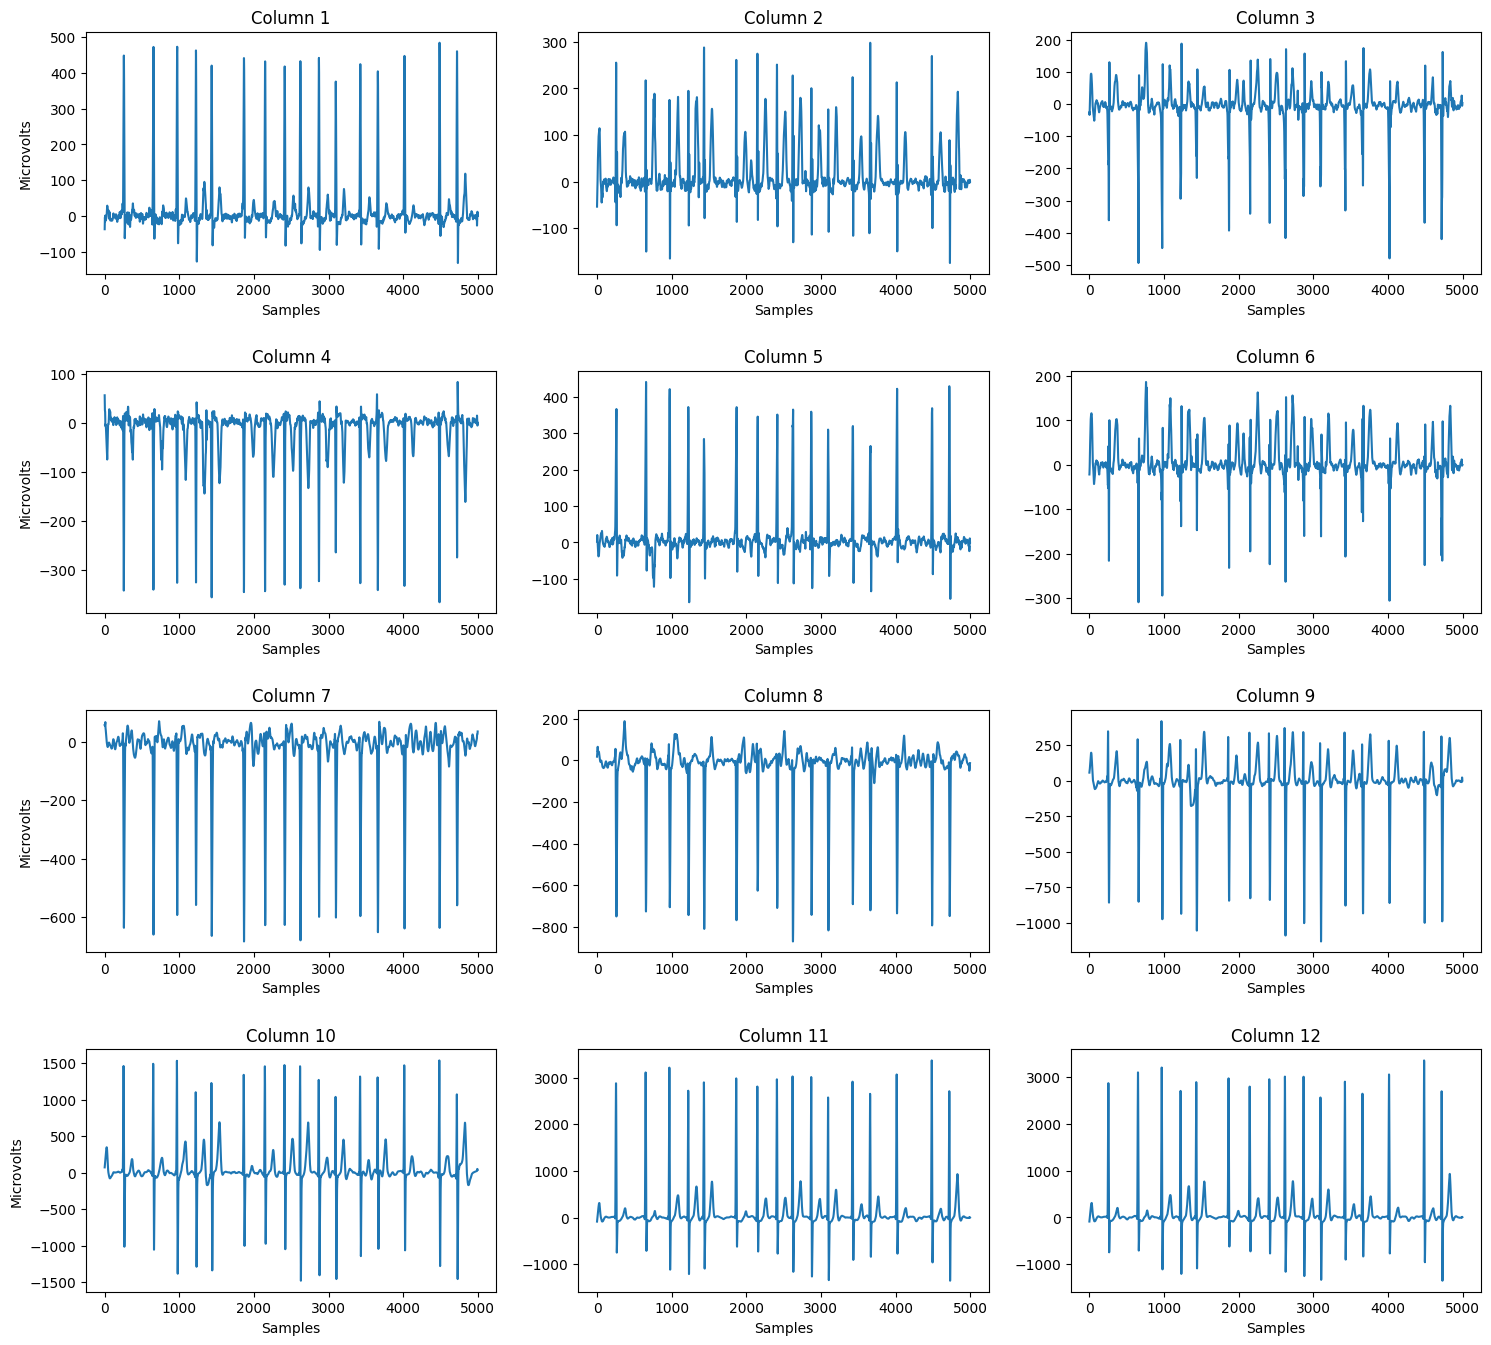

In [14]:
cols, rows = 3, 4

fig, ax = plt.subplots(ncols=cols, nrows=rows,figsize = (18, 14))
for r in range(rows):
    for c in range(cols):
        i = r*cols + c
        ax_i = ax[r, c]      
        x = df[df.columns[i]].to_numpy()
        ax_i.plot(x)
        ax_i.set_title(f"Column {i+1}")
        ax_i.set_xlabel("Samples")
        if i % 3 == 0:
            ax_i.set_ylabel("Microvolts")
plt.subplots_adjust(bottom=.05, top=.95, hspace=.4)

diag.loc[diag["FileName"] == file_name[:-4]]

# Get all data

## Get label 

In [15]:
l = set()
error_file_1 = []
error_file_2 = []
for file_name in os.listdir(input_path):
    df = pd.read_csv(input_path + file_name)
    l.add(df.shape[0])
    if df.shape[0] == 1925:
        error_file_1.append(file_name[:-4])
    if np.isnan(df.to_numpy()).any():
        error_file_2.append(file_name[:-4])
print(f"Shape: {l}")
print(f"K đủ 4999 mẫu: ")
for i in error_file_1:
    print(i)
print(f"K đủ 12 leads:")
for i in error_file_2:
    print(i)

Shape: {1925, 4999}
K đủ 4999 mẫu: 
MUSE_20180113_124215_52000
K đủ 12 leads:
MUSE_20180113_181145_89000
MUSE_20180113_180425_75000
MUSE_20180712_152014_31000
MUSE_20180114_124230_39000
MUSE_20180712_151357_86000
MUSE_20180712_151351_36000
MUSE_20180119_174843_24000
MUSE_20180113_124215_52000
MUSE_20180210_130454_71000
MUSE_20180712_153632_30000
MUSE_20180114_080214_06000
MUSE_20180712_152019_73000
MUSE_20180712_151353_58000
MUSE_20180712_152024_00000
MUSE_20180712_152022_92000
MUSE_20180712_152114_47000
MUSE_20180712_153140_95000
MUSE_20180120_121805_89000


## K đủ 12 leads

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
6323,MUSE_20180118_171900_51000,SB,1AVB LVHV TWC,68,MALE,48,48,108,480,428,-11,23,8,212,266,452


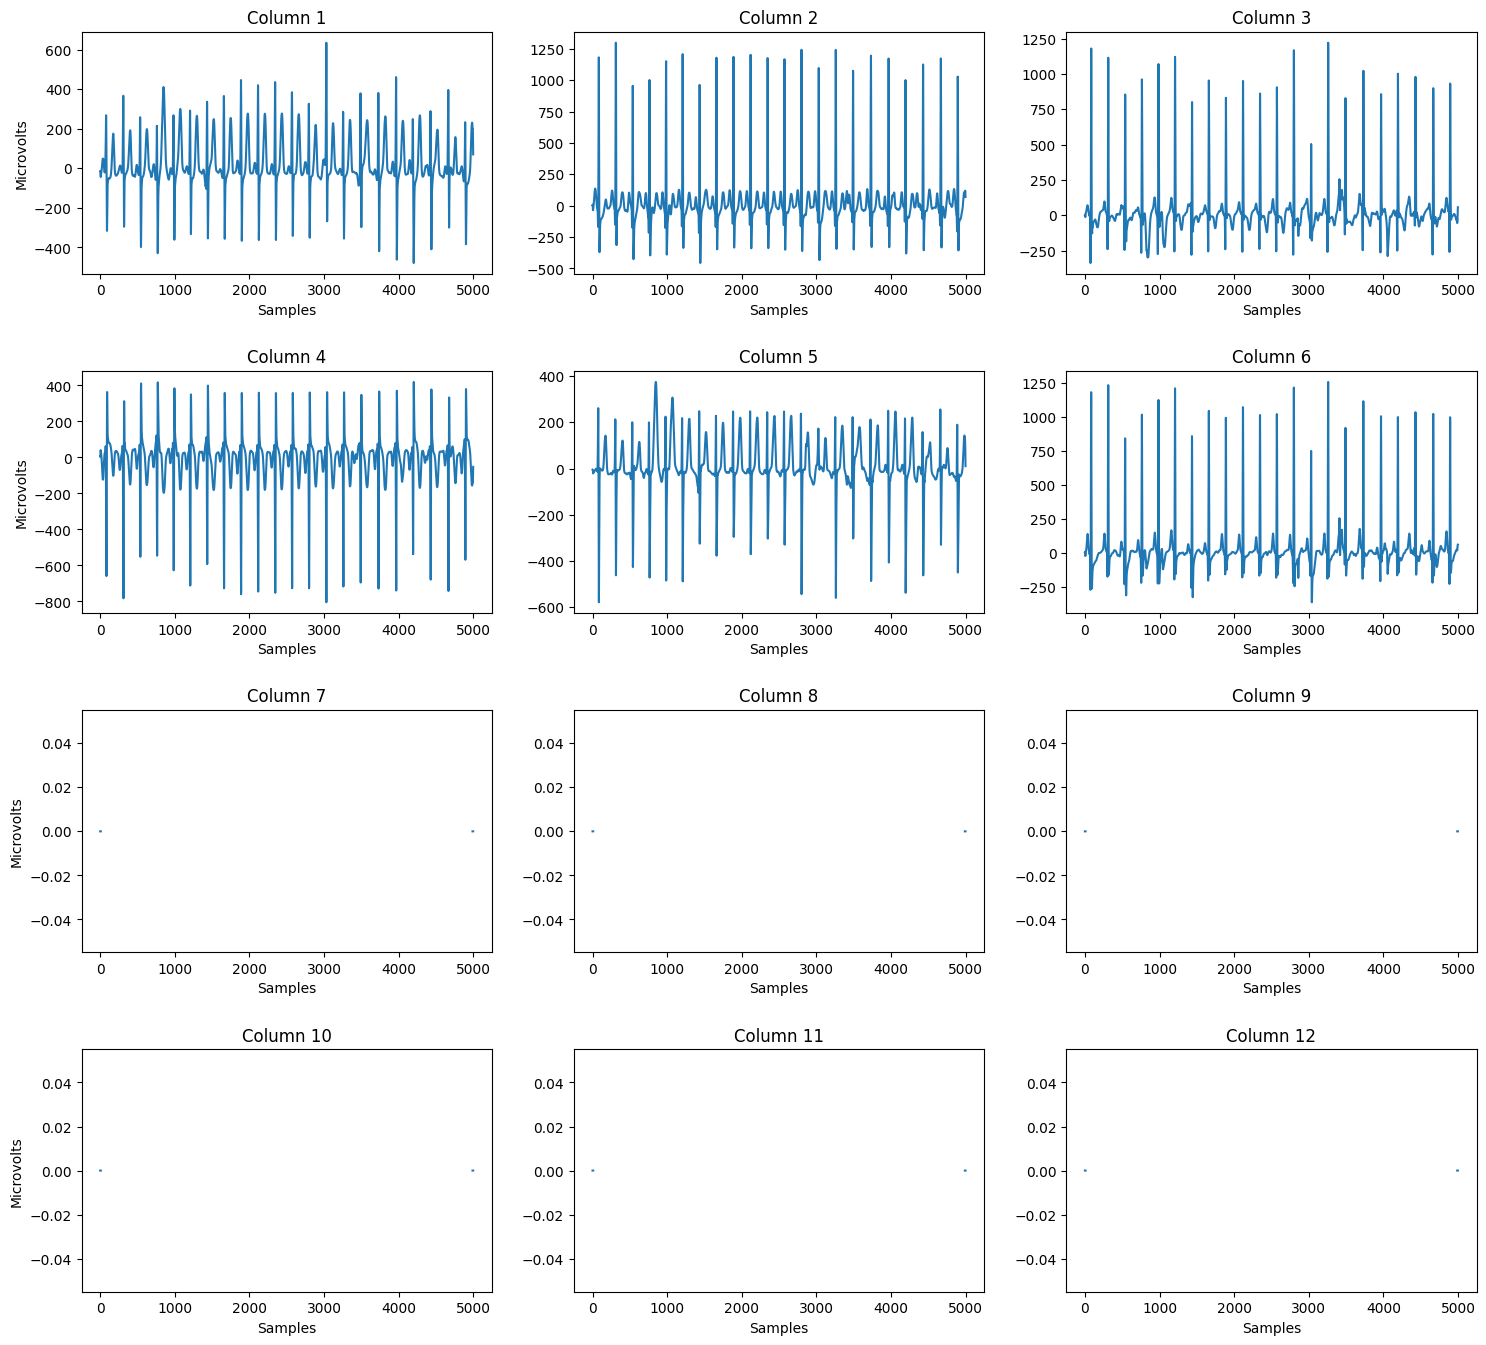

In [16]:
df = pd.read_csv("/kaggle/input/ge-muse-dataset/ECGDataDenoised/ECGDataDenoised/MUSE_20180120_121805_89000.csv")

cols, rows = 3, 4

fig, ax = plt.subplots(ncols=cols, nrows=rows,figsize = (18, 14))
for r in range(rows):
    for c in range(cols):
        i = r*cols + c
        ax_i = ax[r, c]      
        x = df[df.columns[i]].to_numpy()
        ax_i.plot(x)
        ax_i.set_title(f"Column {i+1}")
        ax_i.set_xlabel("Samples")
        if i % 3 == 0:
            ax_i.set_ylabel("Microvolts")
plt.subplots_adjust(bottom=.05, top=.95, hspace=.4)

diag.loc[diag["FileName"] == file_name[:-4]]

## K đủ 4999 mẫu/lead

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
6323,MUSE_20180118_171900_51000,SB,1AVB LVHV TWC,68,MALE,48,48,108,480,428,-11,23,8,212,266,452


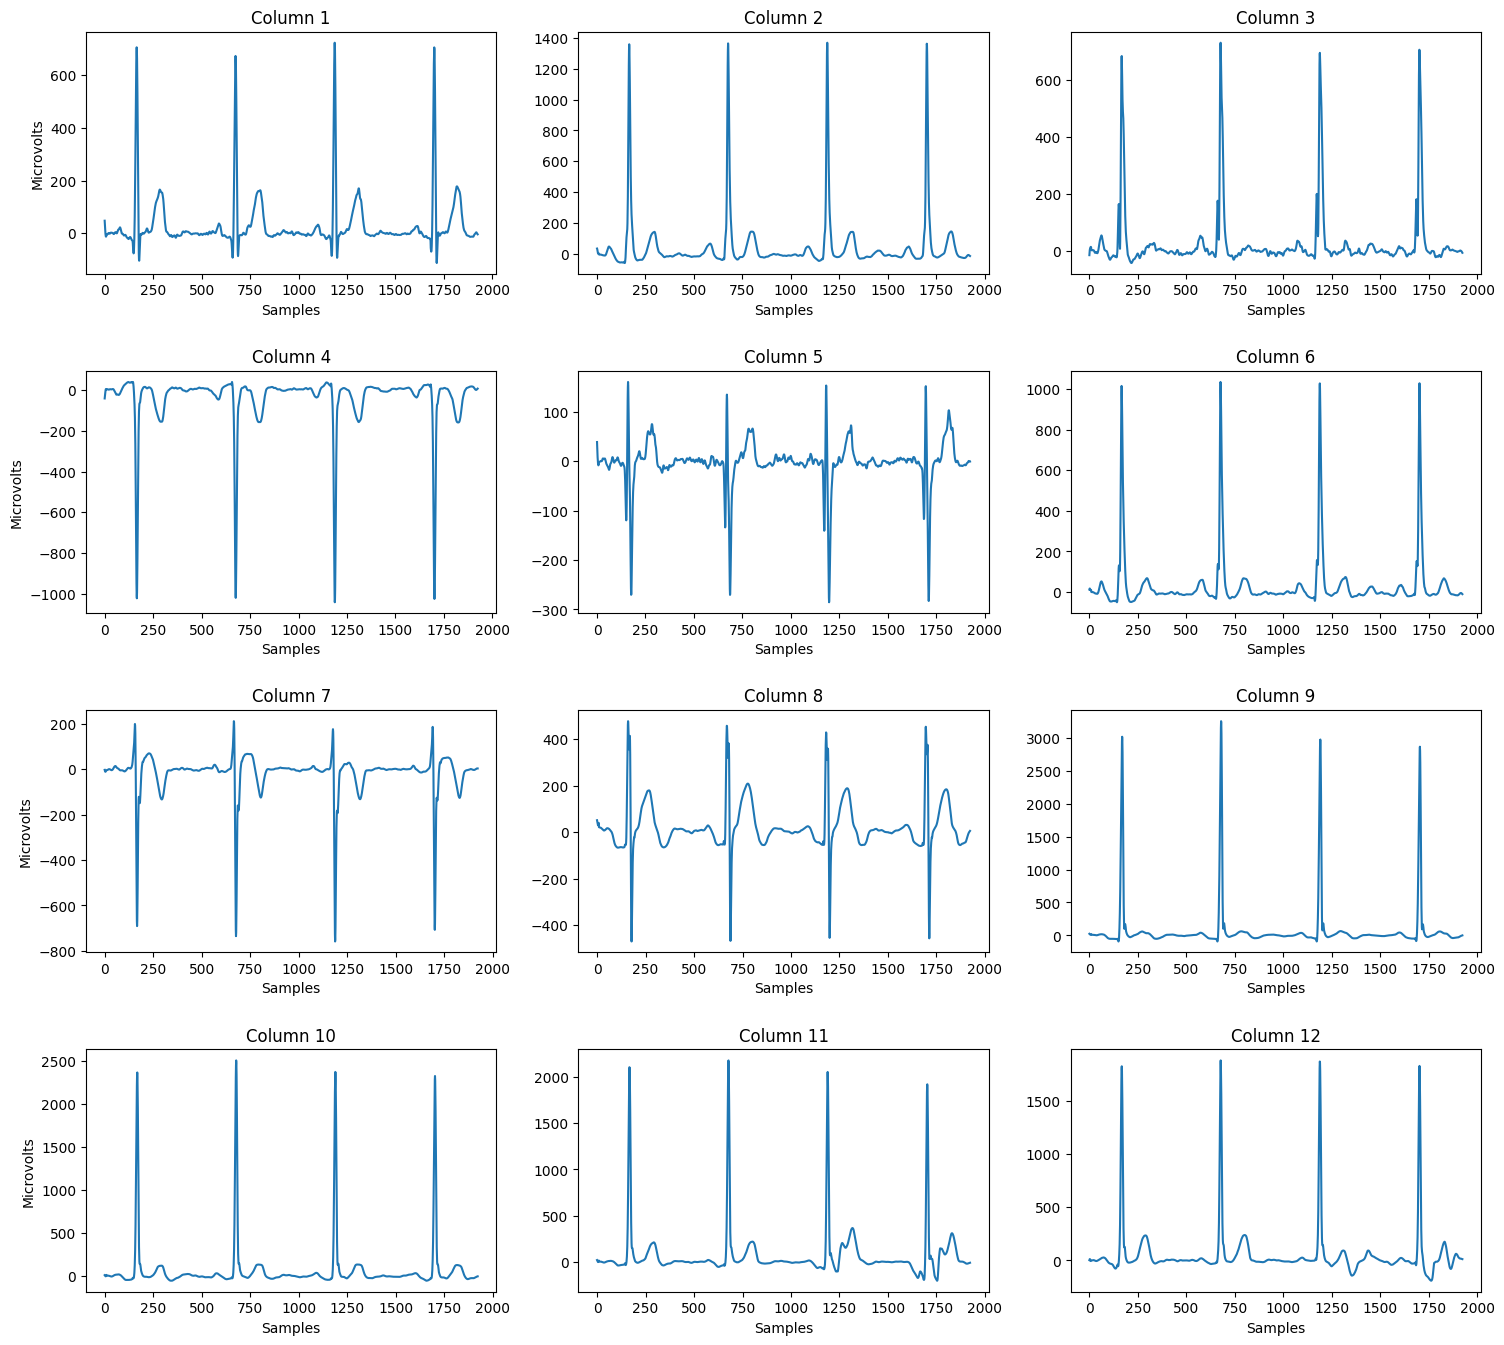

In [17]:
df = pd.read_csv("/kaggle/input/ge-muse-dataset/ECGDataDenoised/ECGDataDenoised/MUSE_20180113_124215_52000.csv")

cols, rows = 3, 4

fig, ax = plt.subplots(ncols=cols, nrows=rows,figsize = (18, 14))
for r in range(rows):
    for c in range(cols):
        i = r*cols + c
        ax_i = ax[r, c]      
        x = df[df.columns[i]].to_numpy()
        ax_i.plot(x)
        ax_i.set_title(f"Column {i+1}")
        ax_i.set_xlabel("Samples")
        if i % 3 == 0:
            ax_i.set_ylabel("Microvolts")
plt.subplots_adjust(bottom=.05, top=.95, hspace=.4)

diag.loc[diag["FileName"] == file_name[:-4]]

In [18]:
print(f"Số file lỗi: {len(set(error_file_1 + error_file_2))}")

Số file lỗi: 18


# Get label

## Merge rhythm

In [19]:
def convert_rhythm(x):
    if x == 'AFIB' or x == 'AF': return 'AFIB'
    if x == 'SVT' or x == 'AT' or x == 'SAAWR' or x == 'ST' or x == 'AVNRT' or x == 'AVRT': return 'GSVT'
    if x == 'SB': return 'SB'
    if x == 'SR' or 'SA': return 'SR'

In [20]:
diag["Rhythm"] = diag["Rhythm"].apply(convert_rhythm)
diag

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SR,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AFIB,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,GSVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,GSVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,GSVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,GSVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


In [21]:
diag["Rhythm"].value_counts()

Rhythm
SB      3889
GSVT    2307
AFIB    2225
SR      2225
Name: count, dtype: int64

In [22]:
label_df = diag[['FileName', 'Rhythm']]
mask = ~label_df['FileName'].isin(error_file_1 + error_file_2)
label_df = label_df.loc[mask]
label_df

,FileName,Rhythm
0,MUSE_20180113_171327_27000,AFIB
1,MUSE_20180112_073319_29000,SB
2,MUSE_20180111_165520_97000,SR
3,MUSE_20180113_121940_44000,SB
4,MUSE_20180112_122850_57000,AFIB
...,...,...
10641,MUSE_20181222_204306_99000,GSVT
10642,MUSE_20181222_204309_22000,GSVT
10643,MUSE_20181222_204310_31000,GSVT
10644,MUSE_20181222_204312_58000,GSVT


=> Bỏ 18 file lỗi

In [23]:
label_df["Rhythm"].value_counts()

Rhythm
SB      3888
GSVT    2300
SR      2222
AFIB    2218
Name: count, dtype: int64

In [24]:
label_enc = pd.get_dummies(label_df.drop(columns = "FileName"), columns = ["Rhythm"]).astype(int)
label_enc

,Rhythm_AFIB,Rhythm_GSVT,Rhythm_SB,Rhythm_SR
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
10641,0,1,0,0
10642,0,1,0,0
10643,0,1,0,0
10644,0,1,0,0


In [25]:
label_df1 = pd.concat([label_df, label_enc], axis = 1, ignore_index = False)
label_df1

,FileName,Rhythm,Rhythm_AFIB,Rhythm_GSVT,Rhythm_SB,Rhythm_SR
0,MUSE_20180113_171327_27000,AFIB,1,0,0,0
1,MUSE_20180112_073319_29000,SB,0,0,1,0
2,MUSE_20180111_165520_97000,SR,0,0,0,1
3,MUSE_20180113_121940_44000,SB,0,0,1,0
4,MUSE_20180112_122850_57000,AFIB,1,0,0,0
...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,GSVT,0,1,0,0
10642,MUSE_20181222_204309_22000,GSVT,0,1,0,0
10643,MUSE_20181222_204310_31000,GSVT,0,1,0,0
10644,MUSE_20181222_204312_58000,GSVT,0,1,0,0


## Tách từng label ra

In [26]:
import seaborn as sns

In [27]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(label_df1, test_size=0.2, stratify=label_df1['Rhythm'])

In [28]:
label = label_df1["Rhythm"].unique()
label

array(['AFIB', 'SB', 'SR', 'GSVT'], dtype=object)

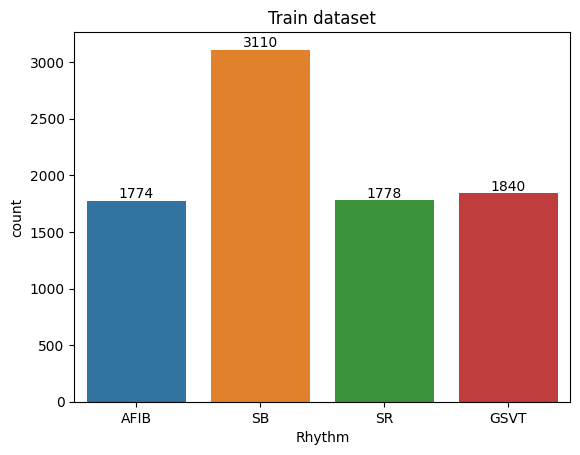

In [29]:
ax = sns.countplot(data = train_df, x = "Rhythm", order = label)
ax.bar_label(ax.containers[0])
ax.set_title("Train dataset")
plt.show()

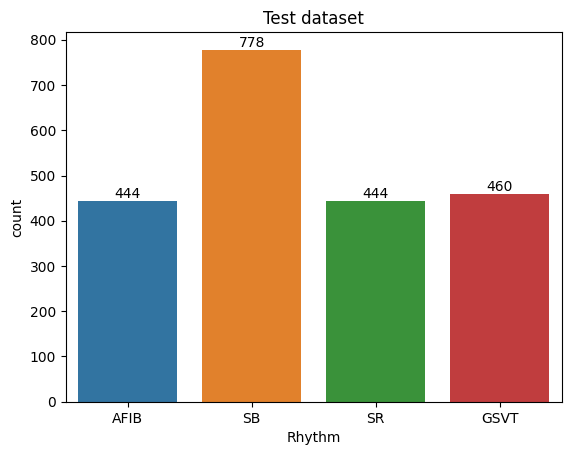

In [30]:
ax = sns.countplot(data = test_df, x = "Rhythm", order = label)
ax.bar_label(ax.containers[0])
ax.set_title("Test dataset")
plt.show()

## Chia tập train thành train - val

In [31]:
train_df, val_df = train_test_split(train_df, test_size = 0.25, stratify = train_df["Rhythm"])

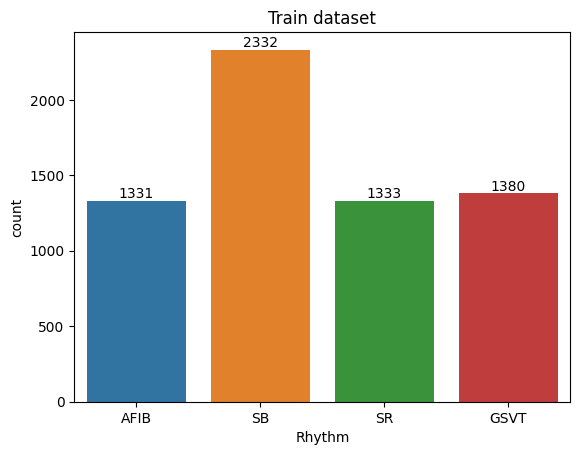

In [32]:
ax = sns.countplot(data = train_df, x = "Rhythm", order = label)
ax.bar_label(ax.containers[0])
ax.set_title("Train dataset")
plt.show()

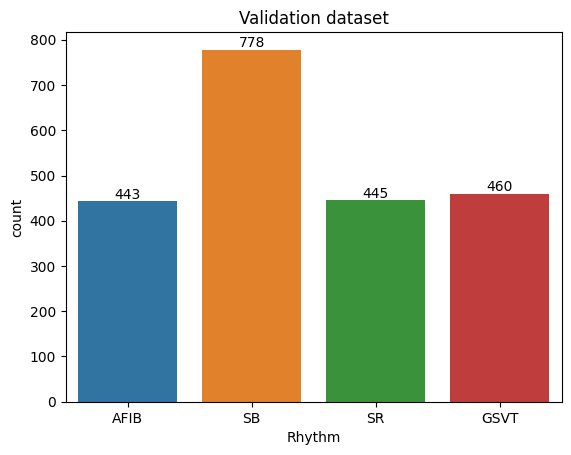

In [33]:
ax = sns.countplot(data = val_df, x = "Rhythm", order = label)
ax.bar_label(ax.containers[0])
ax.set_title("Validation dataset")
plt.show()

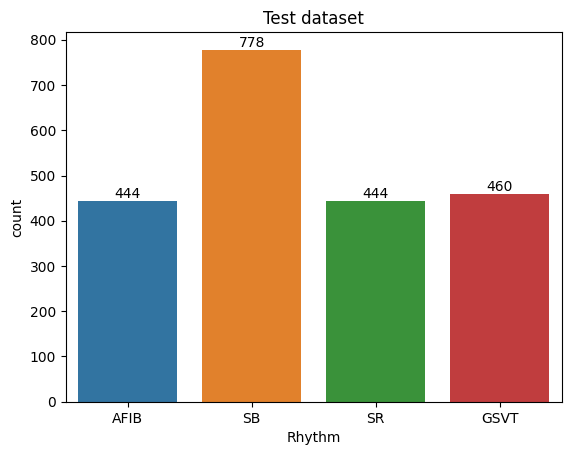

In [34]:
ax = sns.countplot(data = test_df, x = "Rhythm", order = label)
ax.bar_label(ax.containers[0])
ax.set_title("Test dataset")
plt.show()

### => Train - val - test: 60 - 20 - 20 (%)

In [35]:
train_df.to_csv("/kaggle/working/train_label.csv")
val_df.to_csv("/kaggle/working/val_label.csv")
test_df.to_csv("/kaggle/working/test_label.csv")

In [36]:
all_df = pd.concat([train_df, val_df, test_df])
all_df.shape

(10628, 6)

In [37]:
all_df.to_csv("/kaggle/working/all_label.csv")

### Get signal

In [38]:
def get_signal(path_to_label):
    signals = []
    label_df = pd.read_csv(path_to_label)
    for file_name in label_df["FileName"]:
        signal = pd.read_csv("/kaggle/input/ge-muse-dataset/ECGDataDenoised/ECGDataDenoised/" + file_name +".csv").values
        signals.append(signal)
    return np.array(signals)

In [39]:
train_signal = get_signal("/kaggle/working/train_label.csv")
val_signal = get_signal("/kaggle/working/val_label.csv")
test_signal = get_signal("/kaggle/working/test_label.csv")

In [40]:
print(f"Train signal shape: {train_signal.shape}")
print(f"Val signal shape: {val_signal.shape}")
print(f"Test signal shape: {test_signal.shape}")

Train signal shape: (6376, 4999, 12)
Val signal shape: (2126, 4999, 12)
Test signal shape: (2126, 4999, 12)


In [41]:
all_signal = np.concatenate((train_signal, val_signal, test_signal))
all_signal.shape

(10628, 4999, 12)

In [42]:
np.save("/kaggle/working/all_signal.npy", all_signal)

Tại vì lớp ECGSequence nhận đầu vào data và label là toàn bộ dữ liệu.<br>
Nên ở đây, tách ra 3 bộ train-val-test. Sau đó ghép vào

# Model

In [4]:
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Activation, Add, Flatten, Dense)
from tensorflow.keras.models import Model
import tensorflow as tf


class ResidualUnit(object):
    """Residual unit block (unidimensional).
    Parameters
    ----------
    n_samples_out: int
        Number of output samples.
    n_filters_out: int
        Number of output filters.
    kernel_initializer: str, optional
        Initializer for the weights matrices. See Keras initializers. By default it uses
        'he_normal'.
    dropout_keep_prob: float [0, 1), optional
        Dropout rate used in all Dropout layers. Default is 0.8
    kernel_size: int, optional
        Kernel size for convolutional layers. Default is 17.
    preactivation: bool, optional
        When preactivation is true use full preactivation architecture proposed
        in [1]. Otherwise, use architecture proposed in the original ResNet
        paper [2]. By default it is true.
    postactivation_bn: bool, optional
        Defines if you use batch normalization before or after the activation layer (there
        seems to be some advantages in some cases:
        https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md).
        If true, the batch normalization is used before the activation
        function, otherwise the activation comes first, as it is usually done.
        By default it is false.
    activation_function: string, optional
        Keras activation function to be used. By default 'relu'.
    """

    def __init__(self, n_samples_out, n_filters_out, kernel_initializer='he_normal',
                 dropout_keep_prob=0.8, kernel_size=17, preactivation=True,
                 postactivation_bn=False, activation_function='relu'):
        self.n_samples_out = n_samples_out
        self.n_filters_out = n_filters_out
        self.kernel_initializer = kernel_initializer
        self.dropout_rate = 1 - dropout_keep_prob
        self.kernel_size = kernel_size
        self.preactivation = preactivation
        self.postactivation_bn = postactivation_bn
        self.activation_function = activation_function

    def _skip_connection(self, y, downsample, n_filters_in):
        """Implement skip connection."""
        # Deal with downsampling
        if downsample > 1:
            y = MaxPooling1D(downsample, strides=downsample, padding='same')(y)
        elif downsample == 1:
            y = y
        else:
            raise ValueError("Number of samples should always decrease.")
        # Deal with n_filters dimension increase
        if n_filters_in != self.n_filters_out:
            # This is one of the two alternatives presented in ResNet paper
            # Other option is to just fill the matrix with zeros.
            y = Conv1D(self.n_filters_out, 1, padding='same',
                       use_bias=False, kernel_initializer=self.kernel_initializer)(y)
        return y

    def _batch_norm_plus_activation(self, x):
        if self.postactivation_bn:
            x = Activation(self.activation_function)(x)
            x = BatchNormalization(center=False, scale=False)(x)
        else:
            x = BatchNormalization()(x)
            x = Activation(self.activation_function)(x)
        return x

    def __call__(self, inputs):
        """Residual unit."""
        x, y = inputs
        n_samples_in = y.shape[1]
        downsample = n_samples_in // self.n_samples_out
        n_filters_in = y.shape[2]
        y = self._skip_connection(y, downsample, n_filters_in)
        # 1st layer
        x = Conv1D(self.n_filters_out, self.kernel_size, padding='same',
                   use_bias=False, kernel_initializer=self.kernel_initializer)(x)
        x = self._batch_norm_plus_activation(x)
        if self.dropout_rate > 0:
            x = Dropout(self.dropout_rate)(x)

        # 2nd layer
        x = Conv1D(self.n_filters_out, self.kernel_size, strides=downsample,
                   padding='same', use_bias=False,
                   kernel_initializer=self.kernel_initializer)(x)
        if self.preactivation:
            x = Add()([x, y])  # Sum skip connection and main connection
            y = x
            x = self._batch_norm_plus_activation(x)
            if self.dropout_rate > 0:
                x = Dropout(self.dropout_rate)(x)
        else:
            x = BatchNormalization()(x)
            x = Add()([x, y])  # Sum skip connection and main connection
            x = Activation(self.activation_function)(x)
            if self.dropout_rate > 0:
                x = Dropout(self.dropout_rate)(x)
            y = x
        return [x, y]


def get_model(n_classes, last_layer='sigmoid'):
    kernel_size = 16
    kernel_initializer = 'he_normal'
    signal = Input(shape=(4999, 12), dtype=np.float32, name='signal')
    x = signal
    x = Conv1D(64, kernel_size, padding='same', use_bias=False,
               kernel_initializer=kernel_initializer)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x, y = ResidualUnit(1024, 128, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, x])
    x, y = ResidualUnit(256, 196, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x, y = ResidualUnit(64, 256, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x, _ = ResidualUnit(16, 320, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x = Flatten()(x)
    diagn = Dense(n_classes, activation=last_layer, kernel_initializer=kernel_initializer)(x)
#     label_predict = tf.math.argmax(diagn)
    model = Model(signal, diagn)
    return model


model = get_model(4)
model.summary()

2024-06-03 10:53:14.780189: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 10:53:14.780300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 10:53:14.918944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ signal (InputLayer) │ (None, 4999, 12)  │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 4999, 64)  │     12,288 │ signal[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 4999, 64)  │        256 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 4999, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 4999, 128) │    131,072 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4999, 128) │        512 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 4999, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4999, 128) │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 1250, 64)  │          0 │ activation[0][0]  │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 1250, 128) │    262,144 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 1250, 128) │      8,192 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1250, 128) │          0 │ conv1d_3[0][0],   │
│                     │                   │            │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1250, 128) │        512 │ add[0][0]         │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 1250, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1250, 128) │          0 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 1250, 196) │    401,408 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1250, 196) │        784 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 1250, 196) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1250, 196) │          0 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 313, 128)  │          0 │ add[0][0]       

 Total params: 6,420,516 (24.49 MB)

 Trainable params: 6,416,788 (24.48 MB)

 Non-trainable params: 3,728 (14.56 KB)

# Train model

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import *

In [45]:
# pd.read_csv("/kaggle/working/all_label.csv").drop(columns = ["Unnamed: 0", "FileName", "Rhythm"]).values.shape[1]

In [10]:
class ECGSequence(Sequence):
    @classmethod
    def get_train_val_and_test(cls, data_path, label_path, batch_size=8):
        data = np.load(data_path)
        n = len(data)
        n_train = 6376
        n_val = 2126
        train_seq = cls(data_path, label_path, batch_size, end_idx=n_train)
        valid_seq = cls(data_path, label_path, batch_size, start_idx=n_train, end_idx = n_train + n_val)
        test_seq = cls(data_path, label_path, batch_size, start_idx = n_train + n_val)
        return train_seq, valid_seq, test_seq

    def __init__(self, data_path, label_path, batch_size=8,
                 start_idx=0, end_idx=None):
       
        self.y = pd.read_csv(label_path
                            ).drop(columns = ["Unnamed: 0", "FileName", "Rhythm"]).values
        self.x = np.load(data_path)
        self.batch_size = batch_size
        if end_idx is None:
            end_idx = len(self.x)
        self.start_idx = start_idx
        self.end_idx = end_idx

    @property
    def n_classes(self):
        return self.y.shape[1]

    # Trả về giá trị khi gọi đến đối tượng luôn
    def __getitem__(self, idx):
        start = self.start_idx + idx * self.batch_size
        end = min(start + self.batch_size, self.end_idx)
        if self.y is None:
            return np.array(self.x[start:end, :, :])
        else:
            return np.array(self.x[start:end, :, :]), np.array(self.y[start:end])

    def __len__(self):
        return math.ceil((self.end_idx - self.start_idx) / self.batch_size)


In [6]:
data_path = "/kaggle/input/ge-muse-split/all_signal.npy"
label_path = "/kaggle/input/ge-muse-split/all_label.csv"

In [11]:
batch_size = 64
train_seq, valid_seq, test_seq = ECGSequence.get_train_val_and_test(data_path = data_path, 
                                                     label_path = label_path, 
                                                     batch_size = batch_size)

In [20]:
    # Optimization settings
loss = 'binary_crossentropy'
lr = 0.0001
opt = Adam(lr)
callbacks = [ReduceLROnPlateau(monitor='val_loss',
                                factor=0.1,
                                patience=7,
                                min_lr=lr / 100),
#                                 EarlyStopping(patience=13,  # Patience should be larger than the one in ReduceLROnPlateau
#                                 min_delta=0.00001)
            ]

model = get_model(train_seq.n_classes)
model.compile(loss=loss, optimizer=opt, metrics = ['acc'])
# Create log
callbacks += [TensorBoard(log_dir='./logs', write_graph=False),
              CSVLogger('training.log', append=True)]  # Change append to true if continuing training
# Save the BEST and LAST model
callbacks += [ModelCheckpoint('/kaggle/working/backup_model_last.keras'),
              ModelCheckpoint('/kaggle/working/backup_model_best.keras', save_best_only=True)]
# Train neural network
history = model.fit(train_seq,
                    epochs=25,
                    initial_epoch=0, 
                    callbacks=callbacks,
                    validation_data=valid_seq,
                    verbose=1)


Epoch 1/25


2024-06-03 10:56:34.568399: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=2} for conv (f32[64,320,1,79]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,256,1,94]{3,2,1,0}, f32[320,256,1,16]{3,2,1,0}), window={size=1x16}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-03 10:56:34.827869: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.259563981s
Trying algorithm eng3{k11=2} for conv (f32[64,320,1,79]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,256,1,94]{3,2,1,0}, f32[320,256,1,16]{3,2,1,0}), window={size=1x16}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-03 10:56:36.133941: E external/local_xla/xla/service/slow_o

 33/100 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - acc: 0.4602 - loss: 0.5580

2024-06-03 10:58:14.543513: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=2} for conv (f32[256,320,1,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,40,1,94]{3,2,1,0}, f32[320,40,1,79]{3,2,1,0}), window={size=1x79}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-03 10:58:14.592552: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.04916324s
Trying algorithm eng3{k11=2} for conv (f32[256,320,1,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,40,1,94]{3,2,1,0}, f32[320,40,1,79]{3,2,1,0}), window={size=1x79}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-03 10:58:15.759774: E external/local_xla/xla/service/slow_op

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - acc: 0.5453 - loss: 0.4837

W0000 00:00:1717412324.699985     280 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 163s 908ms/step - acc: 0.5462 - loss: 0.4830 - val_acc: 0.7648 - val_loss: 0.3156 - learning_rate: 1.0000e-04
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - acc: 0.8436 - loss: 0.2320 - val_acc: 0.8147 - val_loss: 0.2290 - learning_rate: 1.0000e-04
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 305ms/step - acc: 0.9086 - loss: 0.1441 - val_acc: 0.8467 - val_loss: 0.1931 - learning_rate: 1.0000e-04
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - acc: 0.9381 - loss: 0.0988 - val_acc: 0.8716 - val_loss: 0.1709 - learning_rate: 1.0000e-04
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - acc: 0.9567 - loss: 0.0760 - val_acc: 0.8923 - val_loss: 0.1522 - learning_rate: 1.0000e-04
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 307ms/step - acc: 0.9618 - loss: 0.0629 - val_acc: 0.9153 - val_loss: 0.1248 - learning_rate: 1.0000e-04
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - acc: 0.9742 - loss: 0.0508 - val_acc: 0.9327 - val_loss: 0.

In [21]:
# Save model
model.save("./final_model.hdf5")

In [22]:
y_score = model.predict(test_seq)
y_score

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step


array([[9.9999905e-01, 1.7289463e-05, 4.6664312e-07, 3.8393764e-06],
       [8.2982785e-09, 5.9881535e-07, 4.6626187e-07, 9.9999976e-01],
       [1.5503897e-01, 8.9024490e-01, 1.4148229e-04, 2.6752480e-06],
       ...,
       [9.9646521e-01, 4.3269666e-04, 1.3889444e-06, 4.3711974e-03],
       [9.6273220e-01, 1.7385651e-01, 3.0503061e-04, 3.6368903e-07],
       [2.8700120e-10, 6.0045539e-07, 1.0000000e+00, 1.0222634e-06]],
      dtype=float32)

In [24]:
y_score.shape

(2126, 4)

In [33]:
y_pred = np.zeros_like(y_score)
max_indices = np.argmax(y_score, axis = 1)
for i, idx in enumerate(max_indices):
    y_pred[i, idx] = 1
y_pred.shape

(2126, 4)

In [34]:
# Save giá trị dự đoán
np.save("./predict.npy", y_pred)

# Đánh giá hiệu suất

In [35]:
from sklearn.metrics import (confusion_matrix,
                             precision_score, recall_score, f1_score,
                             precision_recall_curve, average_precision_score)
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from scipy.stats.distributions import chi2
from itertools import combinations


# %% Auxiliar functions
def get_scores(y_true, y_pred, score_fun):
    nclasses = np.shape(y_true)[1]
    scores = []
    for name, fun in score_fun.items():
        scores += [[fun(y_true[:, k], y_pred[:, k]) for k in range(nclasses)]]
    return np.array(scores).T


def specificity_score(y_true, y_pred):
    m = confusion_matrix(y_true, y_pred, labels=[0, 1])
    spc = m[0, 0] * 1.0 / (m[0, 0] + m[0, 1])
    return spc

In [39]:
score_fun = {'Precision': precision_score,
             'Recall': recall_score, 'Specificity': specificity_score,
             'F1 score': f1_score}
diagnosis = pd.read_csv("/kaggle/input/ge-muse-split/all_label.csv").drop(columns = ["Unnamed: 0", "FileName", "Rhythm"]).columns
nclasses = train_seq.n_classes
nclasses

4

In [37]:
y_true = pd.read_csv("/kaggle/input/ge-muse-split/test_label.csv").drop(columns = ["Unnamed: 0", "FileName", "Rhythm"]).values
y_true.shape

(2126, 4)

In [40]:
scores = get_scores(y_true, y_pred, score_fun)
scores_df = pd.DataFrame(scores, index=[i[7:] for i in diagnosis], columns=score_fun.keys())
scores_df

,Precision,Recall,Specificity,F1 score
AFIB,0.917595,0.927928,0.978002,0.922732
GSVT,0.938914,0.902174,0.983794,0.920177
SB,0.961538,0.996144,0.977003,0.978535
SR,0.967366,0.934685,0.991677,0.950745


In [41]:
# Save kết quả đánh giá
scores_df.to_csv("result_metrics.csv")

# Thử lấy các features sau lớp dense

In [42]:
inputs = model.input
flatten_output = model.get_layer('flatten_1').output
model_with_flatten_output = Model(inputs=inputs, outputs=flatten_output)

In [43]:
features = model_with_flatten_output.predict(train_seq)
features

100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step


array([[1.5348324 , 0.29912794, 0.53916276, ..., 0.        , 0.4788493 ,
        0.        ],
       [0.54546344, 0.        , 0.14036372, ..., 0.        , 0.8004284 ,
        0.        ],
       [0.527431  , 0.959311  , 0.7697309 , ..., 0.32005763, 0.        ,
        0.        ],
       ...,
       [0.        , 0.01902902, 0.13992542, ..., 0.        , 0.7071395 ,
        0.        ],
       [0.        , 0.61111736, 1.2481074 , ..., 0.        , 1.0281756 ,
        0.        ],
       [0.5566875 , 0.9254135 , 0.        , ..., 1.6715655 , 0.888215  ,
        0.        ]], dtype=float32)

In [44]:
features.shape

(6376, 6400)

In [53]:
np.save("/kaggle/working/features.npy", features)

In [46]:
label_df = pd.read_csv("/kaggle/input/ge-muse-split/train_label.csv")

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

pca = PCA(n_components = 2)
features_pca = pca.fit_transform(features)
features_pca_df = pd.DataFrame(features_pca, columns = ["PC1", "PC2"])
features_pca_df["Label"] = lb.fit_transform(label_pca)
features_pca_df

,PC1,PC2,Label
0,24.306641,-5.198458,0
1,11.413015,8.836507,1
2,22.935745,0.840985,1
3,26.889282,-8.476784,0
4,-9.868465,39.984665,3
...,...,...,...
6371,29.618795,-2.677939,0
6372,25.385555,-4.186147,0
6373,25.156555,-3.005631,1
6374,-18.669331,-3.327190,2


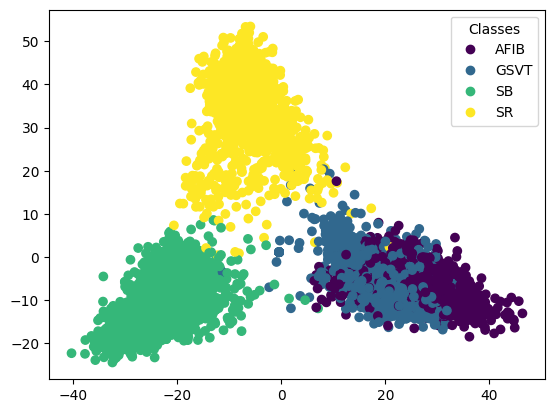

<Figure size 640x480 with 0 Axes>

In [49]:
fig, ax = plt.subplots()

scatter = ax.scatter(features_pca_df["PC1"], features_pca_df["PC2"], c = features_pca_df["Label"])

handles, labels = scatter.legend_elements()

legend1 = ax.legend(handles,lb.classes_,loc="upper right", title="Classes")

plt.show()

plt.savefig("./feature-distribution.png")

In [50]:
X_train, y_train = features, features_pca_df["Label"].values
print(f'X_train: {X_train.shape} \ny_train: {y_train.shape}')

X_train: (6376, 6400) 
y_train: (6376,)


In [54]:
# Dùng SVM để phân loại
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'kernel': ['rbf','linear']
}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.991 total time=  30.5s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.988 total time=  31.0s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.993 total time=  30.1s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.993 total time=  31.4s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.991 total time=  30.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.995 total time=   7.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.998 total time=   7.1s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.999 total time=   6.7s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.997 total time=   6.8s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.998 total time=   6.6s
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.995 total time=  15.0s
[CV 2/5] END ...................C=1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [55]:
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [56]:
grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [66]:
X_test = model_with_flatten_output.predict(test_seq)
y_test = lb.fit_transform(pd.read_csv("/kaggle/input/ge-muse-split/test_label.csv")["Rhythm"].values)
print(f"X_test: {X_test.shape}\ny_test: {y_test.shape}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
X_test: (2126, 6400)
y_test: (2126,)


In [67]:
y_pred = grid.predict(X_test)

In [68]:
y_pred.shape

(2126,)

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       444
           1       0.94      0.91      0.92       460
           2       0.98      0.99      0.98       778
           3       0.97      0.93      0.95       444

    accuracy                           0.95      2126
   macro avg       0.95      0.95      0.95      2126
weighted avg       0.95      0.95      0.95      2126

